# Analysis of Animal Bites in Louisville Metropolitan Area Kentucky for Data Storytelling

In the United States, animal bites are often reported to law enforcement (such as animal control). The main concern with an animal bite is that the animal may be rabid. This dataset includes information on thousands of animal bites which occurred near Louisville, Kentucky from 2012 to 2021 and includes information on whether the animal was quarantined after the bite occurred and whether that animal was rabid.

Contents:

1. Features of Animal Bite Data <br>
2. Animal Species <br>
3. Animal Name VS Number of Bite <br>
4. The Most Aggressive 10 Species <br>
5. When Animals Bite <br>
6. Male or Female is More Dangerous <br>
7. Probability of Being Rabid <br>
8. Common Feature of 4 Rabid Animal <br>

In [9]:
#Import Libraries

import numpy as np #linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization library
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [10]:
data = pd.read_csv(r'C:\Users\abhir\OneDrive\Documents\GitHub\Analysis_of_Animal_Bites_in_City_of_Louisville_Kentucky\Animal_Bites.csv')

In [11]:
# There are 15 features
data.columns

Index(['id', 'bite_date', 'SpeciesIDDesc', 'BreedIDDesc', 'breed',
       'GenderIDDesc', 'color', 'vaccination_yrs', 'vaccination_date',
       'victim_zip', 'AdvIssuedYNDesc', 'WhereBittenIDDesc', 'quarantine_date',
       'DispositionIDDesc', 'head_sent_date', 'release_date', 'ResultsIDDesc',
       'FollowupYNDesc'],
      dtype='object')

In [12]:
#Drop duplicate rows
data = data.drop_duplicates(subset='id')

In [14]:
#data.sort_values("First Name", inplace = True)
data.dropna(subset = ['bite_date'], inplace=True)
#data['bite_date'].isna().sum()

In [15]:
#Order rows based on bite dates from oldest to latest 
data.sort_values("bite_date", inplace = True)
data.head()

,id,bite_date,SpeciesIDDesc,BreedIDDesc,breed,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc,FollowupYNDesc
6282,674039,1949-05-05 00:00:00,DOG,LABRADOR RETRIV,NaN,MALE,BRN WHT,NaN,NaN,40216.0,NaN,BODY,NaN,NaN,NaN,NaN,NaN,NO
9990,708139,1950-08-19 00:00:00,DOG,GOLD RETRIEVER,NaN,MALE,GOLD,NaN,2020-07-01 00:00:00,NaN,NaN,HEAD,NaN,NaN,NaN,2020-11-10 00:00:00,NaN,NO
1382,629208,1952-08-05 00:00:00,DOG,RAT TERRIER,NaN,FEMALE,WHT BRN,3.0,2015-07-10 00:00:00,40299.0,NaN,UNKNOWN,NaN,NaN,NaN,2017-06-08 00:00:00,NaN,NO
3770,651627,1981-05-02 00:00:00,DOG,NaN,BULL TERRIER,NaN,BLACK,NaN,NaN,40272.0,NaN,HEAD,NaN,NaN,NaN,NaN,NaN,NO
9988,708138,1984-07-21 00:00:00,DOG,MASTIF,NaN,MALE,BLACK,1.0,2021-02-01 00:00:00,40210.0,NaN,HEAD,NaN,NaN,NaN,2020-11-09 00:00:00,NaN,NO


In [18]:
data.drop('FollowupYNDesc', axis=1, inplace=True)

In [22]:
#df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
len(data.loc[(data['bite_date'] < '2012-01-01')])

12

In [24]:
data.drop(data[data['bite_date'] < '2012-01-01'].index, inplace = True)

In [25]:
data.head()

,id,bite_date,SpeciesIDDesc,BreedIDDesc,breed,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,518378,2012-06-30 00:00:00,SKUNK,NaN,SKUNK,MALE,NaN,NaN,NaN,40245.0,NaN,BODY,NaN,NaN,NaN,NaN,NaN
2,534290,2013-04-16 00:00:00,DOG,PIT BULL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BODY,NaN,NaN,NaN,NaN,NaN
4,535577,2013-05-03 00:00:00,DOG,PIT BULL,NaN,MALE,NaN,NaN,2011-11-03 00:00:00,40215.0,NaN,BODY,NaN,NaN,NaN,NaN,NaN
6380,674820,2013-05-06 00:00:00,DOG,AAUST. TERR.,NaN,MALE,BLK WHT,1.0,2019-05-17 00:00:00,40222.0,NaN,BODY,NaN,NaN,NaN,2019-05-28 00:00:00,NaN
6,537343,2013-06-02 00:00:00,DOG,GERM SHEPHERD,NaN,NaN,NaN,NaN,NaN,40243.0,NaN,BODY,NaN,NaN,NaN,NaN,NaN


#### Features of Animal Bite Data

bite_date: The date the bite occurred <br>
SpeciesIDDesc: The species of animal that did the biting <br>
BreedIDDesc: Breed (if known) <br>
GenderIDDesc: Gender (of the animal) <br>
color: color of the animal <br>
vaccination_yrs: how many years had passed since the last vaccination <br>
vaccination_date: the date of the last vaccination <br>
victim_zip: the zipcode of the victim <br>
AdvIssuedYNDesc: whether advice was issued <br>
WhereBittenIDDesc: Where on the body the victim was bitten <br>
quarantine_date: whether the animal was quarantined <br>
DispositionIDDesc: whether the animal was released from quarantine <br>
head_sent_date: the date the animal’s head was sent to the lab <br>
release_date: the date the animal was released <br>
ResultsIDDesc: results from lab tests (for rabies) <br>

In [26]:
# There are 9 animals name 
species = data.SpeciesIDDesc
species = species.dropna() #drop nan values in species feature
speciesOfAnimal = species.unique()
print(speciesOfAnimal)

['SKUNK' 'DOG' 'CAT' 'BAT' 'RACCOON' 'FERRET' 'HORSE' 'OTHER' 'RAT']


#### Animal Name VS Number of Bite

Number of dog bite = 7029 <br>
Number of cat bite = 1568 <br>
Number of bat bite = 237 <br>
Number of raccoon bite = 27 <br>
Number of other bite = 11 <br>
Number of rabbit bite = 3 <br>
Number of horse bite = 5 <br>
Number of skunk bite = 1 <br>
Number of ferret bite = 4 <br>

[2, 4616, 822, 67, 21, 8, 2, 10, 2]


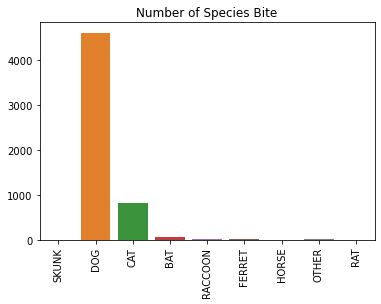

In [27]:
animal_list = []
for  i in speciesOfAnimal:
    animal_list.append(len(species[species==i]))
ax = sns.barplot(x=speciesOfAnimal, y =animal_list)
plt.title('Number of Species Bite')
plt.xticks(rotation=90)
print(animal_list)

#### When Animals Bite

Monthly distribution of dog, cat and bat bites are visualized.

In [28]:
def animal_month(animal,data):
    month_list= ['01','02','03','04','05','06','07','08','09','10','11','12']
    numberOfAnimal = []
    for i in month_list:
        x = data.loc[(data['SpeciesIDDesc']==animal)&(data['bite_date'].str.split('-').str[1]==i)]
        numberOfAnimal.append(len(x))
    ax = sns.barplot(x=month_list,y=numberOfAnimal,palette  = "Blues")
    plt.title(animal + ' bite for 12 month')

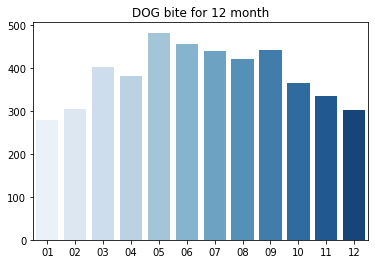

In [29]:
# Dogs mostly bites at 5th month
animal_month('DOG',data)

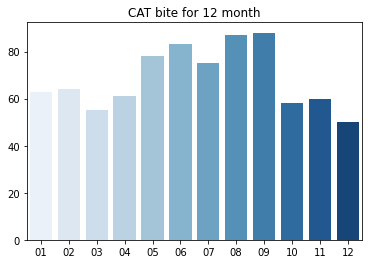

In [30]:
# Cats mostly bites at 9th month
animal_month('CAT',data)

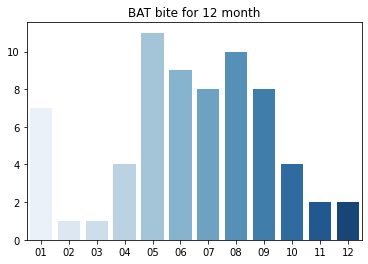

In [31]:
# Bats mostly bites at 5th month
animal_month('BAT',data)

#### The Most Aggressive 10 Species

1. PIT BULL <br>
2. GERM SHEPHERD <br>
3. LABRADOR RETRIV <br>
4. BOXER <br>
5. CHICHAUHUA <br>
6. SHIH TZU <br>
7. BEAGLE <br>
8. ROTTWEILER <br>
9. AAUST. TERR <br>
10. DACHSHUND

Index(['PIT BULL', 'GERM SHEPHERD', 'LABRADOR RETRIV', 'BOXER', 'CHICHAUHUA',
       'BEAGLE', 'ROTTWEILER', 'SHIH TZU', 'AAUST. TERR.', 'GREAT DANE'],
      dtype='object')


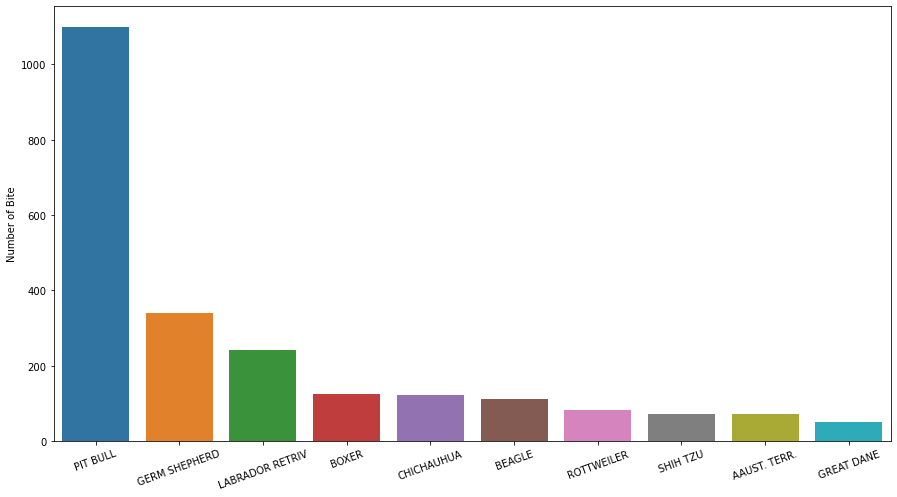

In [32]:
count = data.BreedIDDesc.value_counts()
plt.figure(figsize=(15,8))
ax = sns.barplot(x=count[0:10].index,y=count[0:10])
plt.xticks(rotation=20)
plt.ylabel("Number of Bite")
plt.savefig('graph.png')

print(count[0:10].index)

#### Where the Animals Bite

Where dogs, cats and bats bite people are visualized. While changing bite_place method, you can observe where other animals bite.

In [33]:
def bite_place(animal,data):
    bitePlaces = data.WhereBittenIDDesc.unique()
    #print(bitePlaces)
    head = data.loc[(data['SpeciesIDDesc']==animal)&(data['WhereBittenIDDesc']=='HEAD')]
    body = data.loc[(data['SpeciesIDDesc']==animal)&(data['WhereBittenIDDesc']=='BODY')]
    numberOfHead = len(head)
    numberOfBody = len(body)
    total = numberOfHead+numberOfBody
    fig1=plt.figure()
    ax1=fig1.add_subplot(111,aspect='equal')
    ax1.add_patch(
        patches.Rectangle((0.3,0.1),0.4,0.5,alpha=numberOfBody/float(total),color='r')
    )
    circle = plt.Circle((0.5,0.7),0.1,color='r',alpha=numberOfHead/float(total))
    ax1.add_artist(circle)
    plt.text(0.45,0.7,round(numberOfHead/float(total),2))
    plt.text(0.45,0.4,round(numberOfBody/float(total),2))
    plt.title(str(animal)+' Bite Probability of Head and Body')
    plt.axis('off')

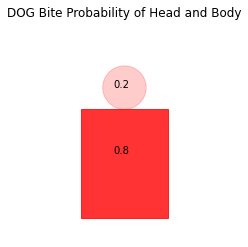

In [34]:
#Dog bites 20% head and 80% body
bite_place('DOG',data)

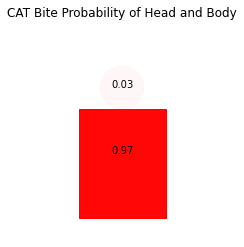

In [35]:
#Cat bites 3% head and 97% body
bite_place('CAT',data)

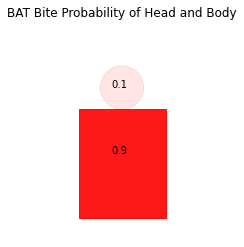

In [36]:
#Bat bites 10% head and 90% body
bite_place('BAT',data)

#### Male or Female - Which is More Dangerous?

MALE      2505
FEMALE    1209
Name: GenderIDDesc, dtype: int64


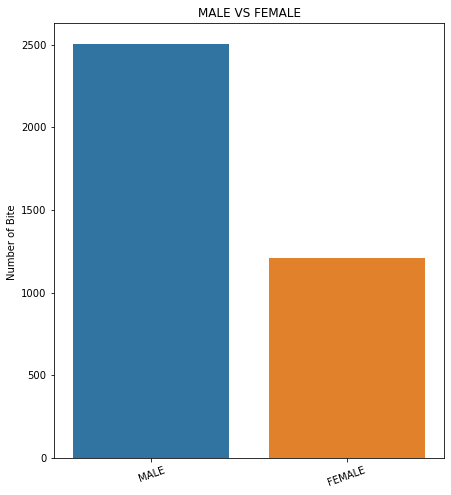

In [37]:
gender = ['MALE','FEMALE']
count_gender = data.GenderIDDesc.value_counts()
plt.figure(figsize= (7,8))
x = sns.barplot(x=gender, y= count_gender[0:2])
plt.ylabel('Number of Bite ')
plt.xticks(rotation = 20)
plt.title('MALE VS FEMALE')
print(count_gender[0:2])

#### Probability of Being Rabid

In [38]:
def rabid_prob(animal,data):
    labels = ['POSITIVE','NEGATIVE']
    colors = ['red','green']
    explode = [0.1,0]
    p = data.loc[(data['SpeciesIDDesc']==animal)&(data['ResultsIDDesc']=='POSITIVE')]
    n = data.loc[(data['SpeciesIDDesc']==animal)&(data['ResultsIDDesc']=='NEGATIVE')]
    sizes = [len(p),len(n)]
    print(sizes)
    if len(p)==0:
        labels = ['','NEGATIVE']
    plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct ='%1.1f&&')
    plt.axis('equal')
    plt.title(animal + ' Rabid Probability')
    plt.show()

[1, 51]


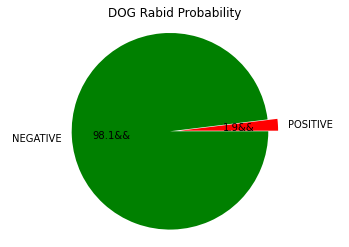

In [39]:
# Dog rabid probability is 1.9%
rabid_prob('DOG',data)

[0, 34]


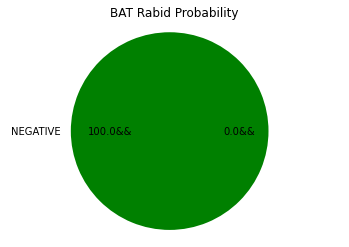

In [40]:
# Bat rabid probability is 0%
rabid_prob('BAT',data)

[0, 34]


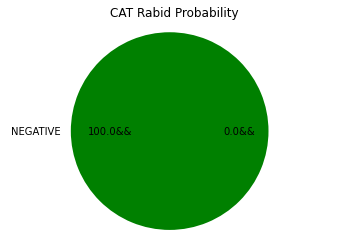

In [41]:
# Bat rabid probability is 0%
rabid_prob('CAT',data)

There is a total of only one rabid record.

#### Common Feature of Rabid Animal

There is only one rabid animal which is a dog. <br>
Information of dog is greatpyreneese, female and white. <br>

In [42]:
a = data.loc[(data['ResultsIDDesc']=='POSITIVE')]
a = a.loc[:,['bite_date','SpeciesIDDesc','BreedIDDesc','GenderIDDesc','color','ResultsIDDesc']]
print(a)

                bite_date SpeciesIDDesc      BreedIDDesc GenderIDDesc  color  \
1210  2017-04-29 00:00:00           DOG  GREAT PYRENEESE       FEMALE  WHITE   

     ResultsIDDesc  
1210      POSITIVE  


#### CONCULUSION
